# Personalizing next-item relevance via psychology-based interest in music recommender systems

Author: Laura Legat

Matriculation ID: 51868012

In [1]:
# import access to Google Drive files

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import needed libraries

import os
import torch
import sys
import pandas as pd
import importlib

!pip install optuna
import optuna
import pickle
import matplotlib.pyplot as plt
import json
import numpy as np
from ast import literal_eval
from collections import OrderedDict
import warnings
import seaborn as sns

!pip install tensorboardX

print('\nAll imports successful!')

In [ ]:
# Check if gpu is available
if torch.cuda.is_available():
    device = torch.device('cuda')
    device_name = torch.cuda.get_device_name(device)
    print(f'Using GPU: {device_name}')
else:
    device = torch.device('cpu')
    print('Using CPU')

print(f'Current device: {device}')

# Data preparation and preprocessing

In [ ]:
# create train-val-test sets for Ex2Vec training, as well as sequences for GRU4Rec training
!python /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/preprocess.py -sl 50 -st 1 -p /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/data/

In [ ]:
%cd /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI

In [ ]:
!python setup.py install

In [6]:
from GRU4Rec_Fork.gru4rec_utils import convert_to_param_str
from ex2vec import Ex2VecEngine

The size of the training set is: 1106989
The size of the validation set is: 156748
The size of the test set is: 320078
The size of the combined (train+val) set is: 1263737


# Training baseline Ex2Vec

In [ ]:
# train standard ex2vec baseline (no GRU4rec item embeddings, no hyperparameter tuning)
!python /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/train.py -n ex2vec_baseline -pth /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/ --use_cuda

In [ ]:
# hyperparameter tuning standard ex2vec
!python /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optuna_paropt.py /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/data/processed.csv -opf /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/GRU4Rec_Fork/paramspaces/deezer_parspace_Ex2Vec.json -nt 2 -mo ex2vec -o /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/best_params_ex2vec.json -ovc /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/results/optuna_vis_ex2vec_TEST.csv -ovp /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/optuna_study_ex2vec_TEST.pkl -sp "sqlite:////content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/optuna_study_ex2vec_TEST.db" -sn "ex2vec_study1_TEST" -a "ex2vec_baseline_tuning" -pth /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/ --use_cuda

In [ ]:
# re-train ex2vec with best parameters (no GRU4Rec item embeddings)
!python /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/train.py -pf /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/best_params_ex2vec.json -t N -n ex2vec_baseline_finaltrain_U5 -ud 1 -pth /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/ --use_cuda

In [ ]:
# unzip compressed study db file while keeping gz intact
!gunzip -k /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/optuna_study_ex2vec.db.gz

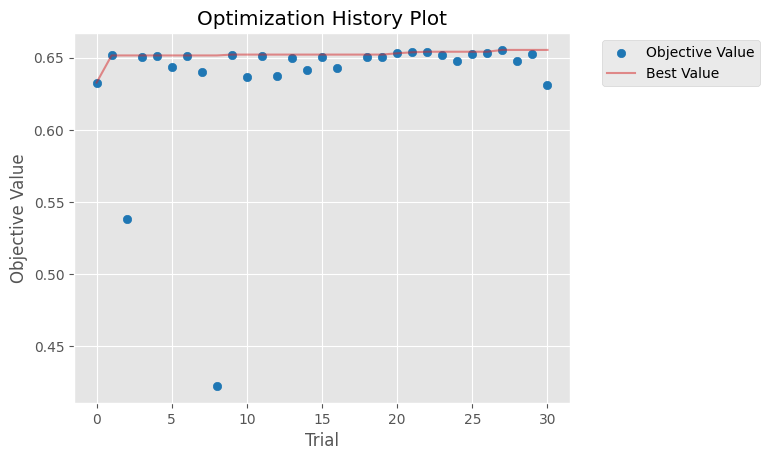

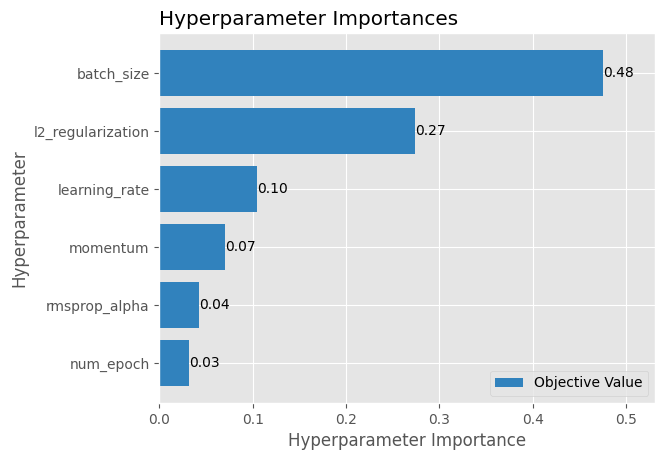

,Unnamed: 0,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_l2_regularization,params_learning_rate,params_momentum,params_num_epoch,params_rmsprop_alpha,state,acc,recall,f1,bacc,search_space_id
0,0,0,0.632695,2024-10-08 11:44:24.271068,2024-10-08 12:13:20.986117,0 days 00:28:56.715049,256,0.000035,0.000011,0.70,100,0.8,COMPLETE,0.636142,0.724547,0.632695,0.631370,1.0
1,1,1,0.651501,2024-10-08 12:16:25.847195,2024-10-08 12:22:30.021673,0 days 00:06:04.174478,1024,0.001322,0.000362,0.25,30,0.3,COMPLETE,0.653393,0.719947,0.651501,0.649800,2.0
2,2,2,0.538302,2024-10-08 12:23:47.515041,2024-10-08 12:29:56.635392,0 days 00:06:09.120351,2048,0.000144,0.000018,0.80,30,0.8,COMPLETE,0.542112,0.629594,0.538302,0.537390,3.0
3,3,3,0.650537,2024-10-08 12:30:08.837099,2024-10-08 12:39:15.937278,0 days 00:09:07.100179,256,0.000049,0.000073,0.65,30,0.8,COMPLETE,0.655128,0.758897,0.650537,0.649526,4.0
4,4,4,0.651463,2024-10-08 12:39:31.184140,2024-10-08 12:50:46.434449,0 days 00:11:15.250309,512,0.004423,0.000066,0.80,50,0.7,COMPLETE,0.651976,0.688413,0.651463,0.650010,5.0
5,5,5,0.643388,2024-10-08 12:54:48.412490,2024-10-08 13:04:29.188554,0 days 00:09:40.776064,2048,0.000162,0.000187,0.90,50,0.3,COMPLETE,0.651708,0.790989,0.643388,0.644190,6.0
6,6,6,0.651200,2024-10-08 13:05:46.145924,2024-10-08 13:34:49.026447,0 days 00:29:02.880523,256,0.000184,0.000017,0.70,100,0.8,COMPLETE,0.656359,0.766544,0.651200,0.650411,7.0
7,7,7,0.639822,2024-10-08 13:34:59.986033,2024-10-08 13:49:36.157838,0 days 00:14:36.171805,256,0.000650,0.000018,0.35,50,0.8,COMPLETE,0.648168,0.787129,0.639822,0.640667,8.0
8,8,8,0.422584,2024-10-08 13:50:06.294424,2024-10-08 14:08:56.832614,0 days 00:18:50.538190,2048,0.009214,0.000044,0.00,100,0.5,COMPLETE,0.539197,0.960310,0.422584,0.516465,9.0
9,9,9,0.652094,2024-10-08 14:11:09.459128,2024-10-08 14:33:11.049999,0 days 00:22:01.590871,512,0.003444,0.000020,0.50,100,0.5,COMPLETE,0.652908,0.697432,0.652094,0.650504,10.0


In [ ]:
warnings.filterwarnings('ignore')
# visualize optuna results for ex2vec
# Load study from pickle file
with open('/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/optuna_study_ex2vec.pkl', 'rb') as f:
    study = pickle.load(f)

# Load trials data from CSV
trials_df = pd.read_csv('/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/results/optuna_vis_ex2vec.csv')

# Optuna visualizations
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.show()

optuna.visualization.matplotlib.plot_param_importances(study)
plt.show()

# Display the trials DataFrame
display(trials_df)


# Training GRU4Rec

In [ ]:
# initial training + hyperparameter optimization with seq_train.csv and seq_val.csv on GRU4Rec
!python /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optuna_paropt.py /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/data/seq_train.csv -opf /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/GRU4Rec_Fork/paramspaces/deezer_parspace_GRU4Rec.json -nt 2 -o /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/best_params_gru4rec.json -mo gru4rec -t /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/data/seq_val.csv -m "1 5 10 20" -ik "itemId" -tk "timestamp" -ovc /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/results/optuna_vis_gru4rec_DELLL.csv -ovp /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/optuna_study_gru4rec_DELLL.pkl -s "/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/models/GRU4Rec_hyperparam_DELLL_{}.pt" -sp "sqlite:////content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/optuna_study_gru4rec_DELLL.db" -sn "gru4rec_study1_DELLL" -pth /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/ --optim

In [ ]:
# retrain gru4rec with best params
"""
params: (from https://github.com/hidasib/GRU4Rec/blob/master/README.md)
  -t    Testset path
  -pf   Parameter file path
  -s    Path to save the state dict to
  -m    Calculate recall, MRR etc. at the given list length
  -ik   Item key
  -tk   Timestamp key
  -d    Device
"""

!python /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/GRU4Rec_Fork/run.py /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/data/seq_combined.csv -pf /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/best_params_gru4rec.json -t /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/data/seq_test.csv -s /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/models/GRU4Rec_finaltrain_bestparams_U5.pt -m 1 5 10 20 -ik "itemId" -tk "timestamp" -pm recall -lpm -pth /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/

In [ ]:
# optional: in case model was trained on cpu, move to gpu
cpu_model = '/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/models/GRU4Rec_bestparams.pt'

gru4rec_model = torch.load(cpu_model)

gru4rec_model.to('cuda')
torch.save(gru4rec_model, '/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/models/GRU4Rec_bestparams_cuda.pt')

In [ ]:
# unzip compressed study db file while keeping gz intact
!gunzip -k /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/optuna_study_gru4rec.db.gz

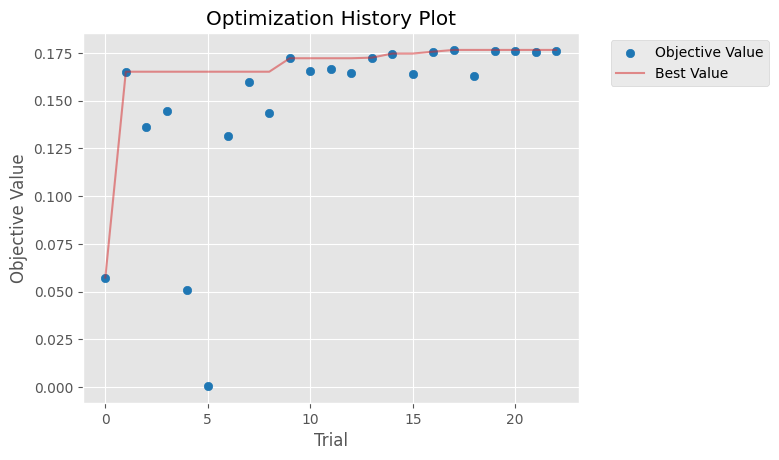

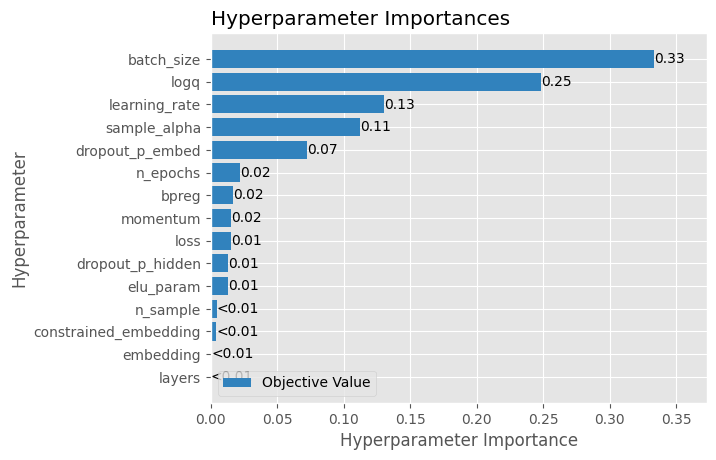

,Unnamed: 0,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_bpreg,params_constrained_embedding,params_dropout_p_embed,...,state,Recall@1,Recall@5,Recall@10,Recall@20,MRR@1,MRR@5,MRR@10,MRR@20,search_space_id
0,0,0,0.057347,2024-10-10 12:23:49.637151,2024-10-10 15:32:17.366146,0 days 03:08:27.728995,256,0.0,False,0.20,...,COMPLETE,0.057347,0.221749,0.359141,0.522107,0.057347,0.111248,0.129393,0.140604,1.0
1,1,1,0.165202,2024-10-10 16:07:07.849502,2024-10-10 20:28:46.098787,0 days 04:21:38.249285,320,1.0,False,0.50,...,COMPLETE,0.165202,0.392929,0.551301,0.704189,0.165202,0.244575,0.265567,0.276230,2.0
2,2,2,0.136413,2024-10-11 20:59:28.637171,2024-10-12 00:07:17.967556,0 days 03:07:49.330385,256,0.0,True,0.00,...,COMPLETE,0.136413,0.371866,0.525892,0.661354,0.136413,0.219931,0.240353,0.249820,3.0
3,3,3,0.144690,2024-10-12 00:54:06.215319,2024-10-12 05:24:22.372529,0 days 04:30:16.157210,240,0.5,False,0.30,...,COMPLETE,0.144690,0.372141,0.517740,0.639006,0.144690,0.225788,0.245092,0.253558,4.0
4,4,4,0.051011,2024-10-12 13:39:51.191912,2024-10-12 16:44:04.617770,0 days 03:04:13.425858,272,1.0,True,0.50,...,COMPLETE,0.051011,0.223126,0.377075,0.576168,0.051011,0.107930,0.128213,0.142060,5.0
5,5,5,0.000595,2024-10-12 17:22:39.486298,2024-10-12 22:07:21.958160,0 days 04:44:42.471862,144,1.0,False,0.35,...,COMPLETE,0.000595,0.002960,0.008715,0.020225,0.000595,0.001253,0.002017,0.002743,6.0
6,6,6,0.131407,2024-10-12 22:16:26.932267,2024-10-13 01:15:52.559408,0 days 02:59:25.627141,384,1.0,True,0.10,...,COMPLETE,0.131407,0.369538,0.532192,0.675675,0.131407,0.216115,0.237612,0.247642,7.0
7,7,7,0.159786,2024-10-13 02:24:00.527751,2024-10-13 06:40:40.729993,0 days 04:16:40.202242,496,1.0,True,0.00,...,COMPLETE,0.159786,0.378816,0.529875,0.668500,0.159786,0.237207,0.257202,0.266904,8.0
8,8,8,0.143780,2024-10-13 13:29:15.861663,2024-10-13 16:40:15.515276,0 days 03:10:59.653613,192,0.0,True,0.10,...,COMPLETE,0.143780,0.380371,0.542644,0.695798,0.143780,0.228390,0.249884,0.260587,9.0
9,9,9,0.172258,2024-10-13 16:58:04.741696,2024-10-13 21:18:43.501714,0 days 04:20:38.760018,336,0.5,False,0.30,...,COMPLETE,0.172258,0.401978,0.551264,0.692913,0.172258,0.252975,0.272786,0.282686,10.0


In [ ]:
warnings.filterwarnings('ignore')
# visualize optuna results for gru4rec
# Load study from pickle file
with open('/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/optuna_study_gru4rec.pkl', 'rb') as f:
    study = pickle.load(f)

# Load trials data from CSV
trials_df = pd.read_csv('/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/results/optuna_vis_gru4rec.csv')

# Optuna visualizations
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.show()

optuna.visualization.matplotlib.plot_param_importances(study)
plt.show()

# Display the trials DataFrame
display(trials_df)

# Combiniation Idea 1: Using GRU4Rec's pre-trained item embeddings in Ex2Vec training

We want to extract the pre-trained item embeddings after training the GRU4Rec model and insert them into Ex2Vec instead of its initial ones. This is done with the idea of bringing in dynamic, intra-session item information as part of Ex2Vec training.

In [ ]:
# train Ex2Vec (with GRU embeddings) with best parameters found through hyperparameter optim
!python /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/train.py -pf /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/best_params_ex2vec.json -t N -n ex2vec_gruembds_finaltrain -ud 1 -pth /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/ -ep /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/GRU4Rec_Fork/chckpts/GRU4Rec_chckpts_Epoch_8_loss0.524467.pt --use_cuda

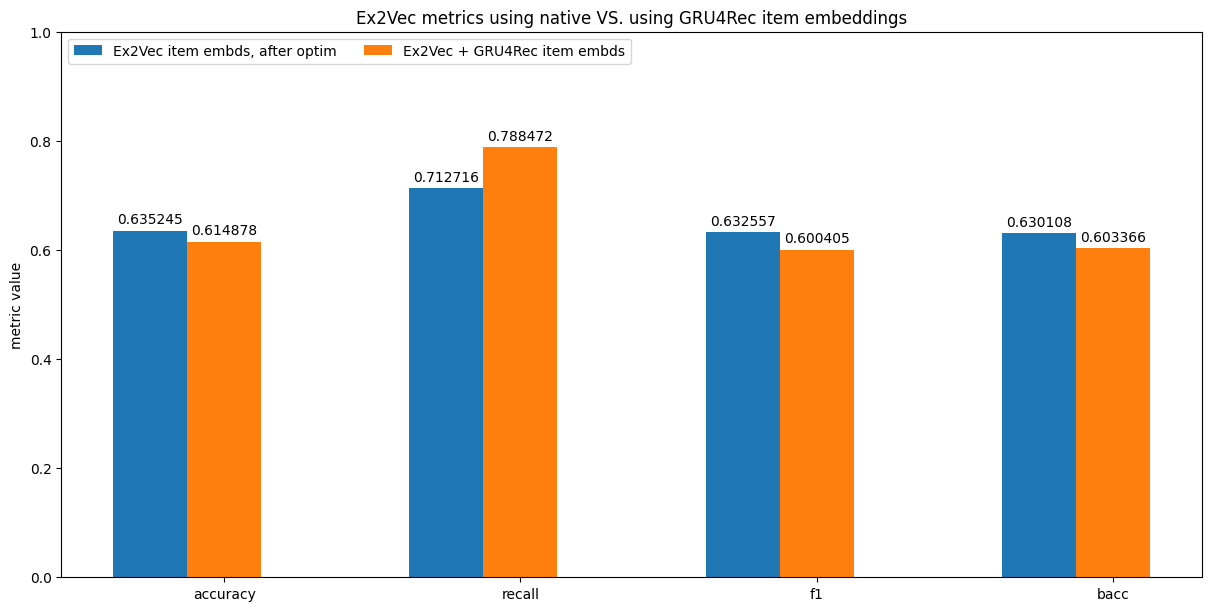

In [13]:
# load all trained model information
trained_models_df = pd.read_csv('/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/results/best_models.csv')

# extract metrics from ex2vec without VS with gru4rec embds
ex2vec_rows = trained_models_df[trained_models_df['model_name'].str.contains('ex2vec_baseline_finaltrain__BS512LR0.00014455048679195258L_DIM64N_EP50_FULL|ex2vec_gruembds_FULL_finaltrain__BS512LR0.00014455048679195258L_DIM64N_EP50_trial19')]

before_after_lists = []
for metric_str in ex2vec_rows['results']: # acc=0.64, recall=0.85, f1=0.62, bacc=0.64
    metrics_list = metric_str.split(', ') # [acc=0.64, recall=0.85, f1=0.62, bacc=0.64]
    metrics_values = [float(metric.split('=')[1]) for metric in metrics_list] # [0.64, 0.85, 0.62, 0.64]
    before_after_lists.append(metrics_values)

metrics = ('accuracy', 'recall', 'f1', 'bacc')
metric_dict = {
    'Ex2Vec item embds, after optim': tuple(before_after_lists[0]),
    'Ex2Vec + GRU4Rec item embds': tuple(before_after_lists[1]),
}

x = np.arange(len(metrics))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')

for k,v in metric_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, v, width, label=k)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('metric value')
ax.set_title('Ex2Vec metrics using native VS. using GRU4Rec item embeddings')
ax.set_xticks(x + width, metrics)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 1)

plt.show()

# Combination Idea 2: GRU4Rec next-item re-ranking by combining relevance scores with Ex2Vec interest scores

## Loading Ex2Vec for Inference

In [ ]:
# load ex2vec best parameters and use them as config
ex2vec_best_param_str = convert_to_param_str('/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/best_params_ex2vec.json')
ex2vec_config = OrderedDict([x.split('=') for x in ex2vec_best_param_str.split(',') if "=" in x])

config = config = {
    "alias": 'ex2vec_baseline_finaltrain',
    "num_epoch": int(ex2vec_config['num_epoch']),
    "batch_size": int(ex2vec_config['batch_size']),
    "optimizer": 'adam',
    "lr": float(ex2vec_config['learning_rate']),
    "rmsprop_alpha": float(ex2vec_config['rmsprop_alpha']),
    "momentum": float(ex2vec_config['momentum']),
    "n_users": 5,
    "n_items": 134,
    "latent_dim": 64,
    "num_negative": 0,
    "l2_regularization": float(ex2vec_config['l2_regularization']),
    "use_cuda": True,
    "device_id": 0,
    "pretrain": True,
    "pretrain_dir": "/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/models/ex2vec_baseline_finaltrain_U5__BS512LR0.00014455048679195258L_DIM64N_EP50_Epoch49_f10.2928.pt",
    "model_dir": "/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/models/{}_Epoch{}_f1{:.4f}.pt",
    "chckpt_dir":"/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/chckpts/{}_Epoch{}_f1{:.4f}.pt",
}

In [ ]:
# instantiate ex2vec model and set to eval mode for inference
ex2vec_pre = Ex2VecEngine(config, '/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/')
ex2vec_pre.model.eval()

## Loading GRU4Rec for inference

In [ ]:
# load current best GRU4Rec model and put it into eval mode for inference
gru4rec_path = '/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/GRU4Rec_Fork/chckpts/GRU4Rec_chckpts_Epoch_8_loss0.524467.pt'
gru = torch.load(gru4rec_path)
gru.model.eval()

## Choose data for inference

In [ ]:
# prepare test data for inference
test_data_path = '/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/data/seq_test.csv'
test_data = pd.read_csv(test_data_path, sep=',', converters={"relational_interval": literal_eval})
n_unique_users = test_data['userId'].nunique()

## Performance comparison

In [ ]:
# prepare variables for results tables and experiments
ex2vec_model_name = os.path.basename(config['pretrain_dir']).split('.pt')[0]
gru4rec_model_name = os.path.basename(gru4rec_path).split('.pt')[0]

# comparison parameters
batch_size = 2048 # 1000-2000 or higher
topk_list = [20, 50, 100] # set different k for top-k experiments
alpha_list = [0.01, 0.03, 0.05, 0.1] # set different alpha's for experiment (alpha = tradeoff between the models)
cutoff = [5, 10, 20] # cutoffs for mrr and recall

In [ ]:
from GRU4Rec_Fork.evaluation import batch_eval, store_only

In [ ]:
# inference run without combination
eval_res = batch_eval(gru=gru, test_data=test_data, cutoff=cutoff, ex2vec=ex2vec_pre.model)

baseline_recalls = ''
baseline_mrrs = ''
for i, c in enumerate(cutoff):
  print('\nRecall@{}: {:.6f} MRR@{}: {:.6f}'.format(c, eval_res[0][c], c, eval_res[1][c]))
  baseline_recalls += 'Recall@{}={:.6f}'.format(c, eval_res[0][c])
  baseline_mrrs += 'MRR@{}={:.6f}'.format(c, eval_res[1][c])

  if i != (len(cutoff) -1):
    baseline_recalls += ','
    baseline_mrrs += ','

In [ ]:
# eval on both models and store the scores for all items in test set
store_only(gru=gru, test_data=test_data, batch_size=batch_size, ex2vec=ex2vec_pre.model, score_store_pth='/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/results')

In [ ]:
#import evaluation
combination_path = '/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/results/score_combination.csv'
combination_modes = ['direct', 'weighted', 'boosted', 'mult']

for topk in topk_list:
    for combination_mode in combination_modes:
        eval_res = batch_eval(gru=gru, test_data=test_data, cutoff=cutoff, ex2vec=ex2vec_pre.model, combination=combination_mode, k=topk, alpha_list=alpha_list)

        for i, alpha in enumerate(alpha_list):
            recalls = ''
            mrrs = ''
            print(['Recall@{} for alpha={}, combination_mode={}, k={}: {:.6f} MRR@{}: {:.6f}'.format(c, alpha, combination_mode, topk, eval_res[0][c][i], c, eval_res[1][c][i]) for c in cutoff])

            recalls += ','.join(['Recall@{}={:.6f}'.format(c, eval_res[0][c][i]) for c in cutoff])
            mrrs += ','.join(['MRR@{}={:.6f}'.format(c, eval_res[1][c][i]) for c in cutoff])

            # log current run of combination idea 2
            combination_row = {
                'gru4rec_model': gru4rec_model_name,
                'ex2vec_model': ex2vec_model_name,
                'seq_len': 50,
                'batch_size': batch_size,
                'combination_mode':combination_mode,
                'alpha': alpha,
                'k':topk,
                'n_user_histories': str(n_unique_users),
                'recalls': recalls,
                'mrrs': mrrs,
                'baseline_recalls': baseline_recalls,
                'baseline_mrrs': baseline_mrrs
            }

            combination_df = pd.DataFrame([combination_row])

            if not os.path.isfile(combination_path):
                combination_df.to_csv(combination_path, mode='w', index=False, header=True)
            else:
                combination_df.to_csv(combination_path, mode='a', index=False, header=False)

Using existing item ID map
The dataframe is already sorted by SessionId
['Recall@5 for alpha=0.01, combination_mode=direct, k=20: 0.000304 MRR@5: 0.000085', 'Recall@10 for alpha=0.01, combination_mode=direct, k=20: 0.001216 MRR@10: 0.000202', 'Recall@20 for alpha=0.01, combination_mode=direct, k=20: 0.001346 MRR@20: 0.000209']
['Recall@5 for alpha=0.03, combination_mode=direct, k=20: 0.000304 MRR@5: 0.000085', 'Recall@10 for alpha=0.03, combination_mode=direct, k=20: 0.001216 MRR@10: 0.000202', 'Recall@20 for alpha=0.03, combination_mode=direct, k=20: 0.001346 MRR@20: 0.000209']
['Recall@5 for alpha=0.05, combination_mode=direct, k=20: 0.000304 MRR@5: 0.000085', 'Recall@10 for alpha=0.05, combination_mode=direct, k=20: 0.001216 MRR@10: 0.000202', 'Recall@20 for alpha=0.05, combination_mode=direct, k=20: 0.001346 MRR@20: 0.000209']
['Recall@5 for alpha=0.1, combination_mode=direct, k=20: 0.000304 MRR@5: 0.000085', 'Recall@10 for alpha=0.1, combination_mode=direct, k=20: 0.001216 MRR@10:

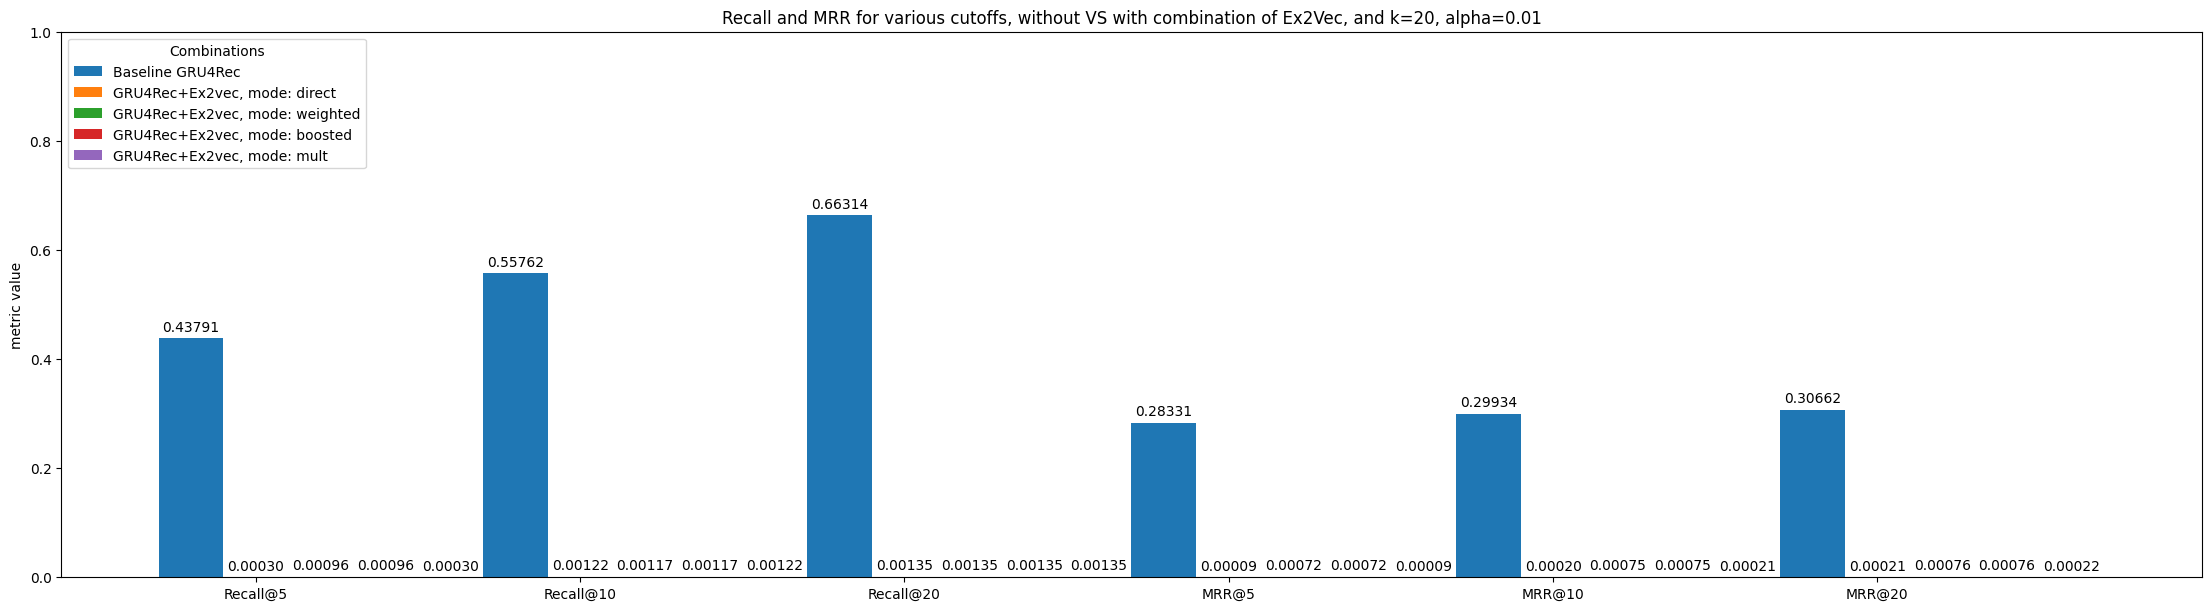

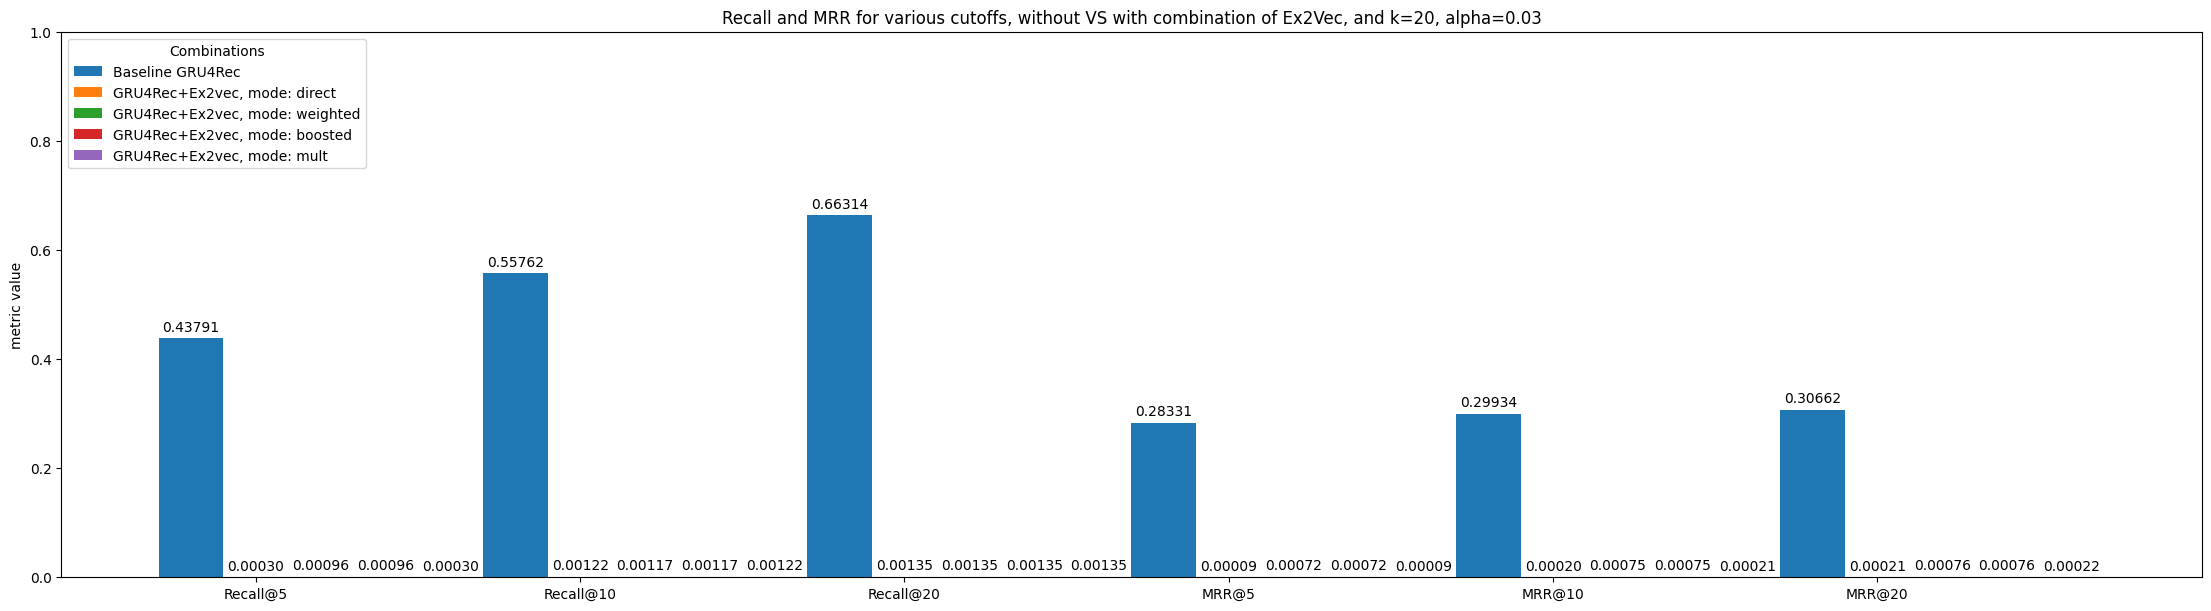

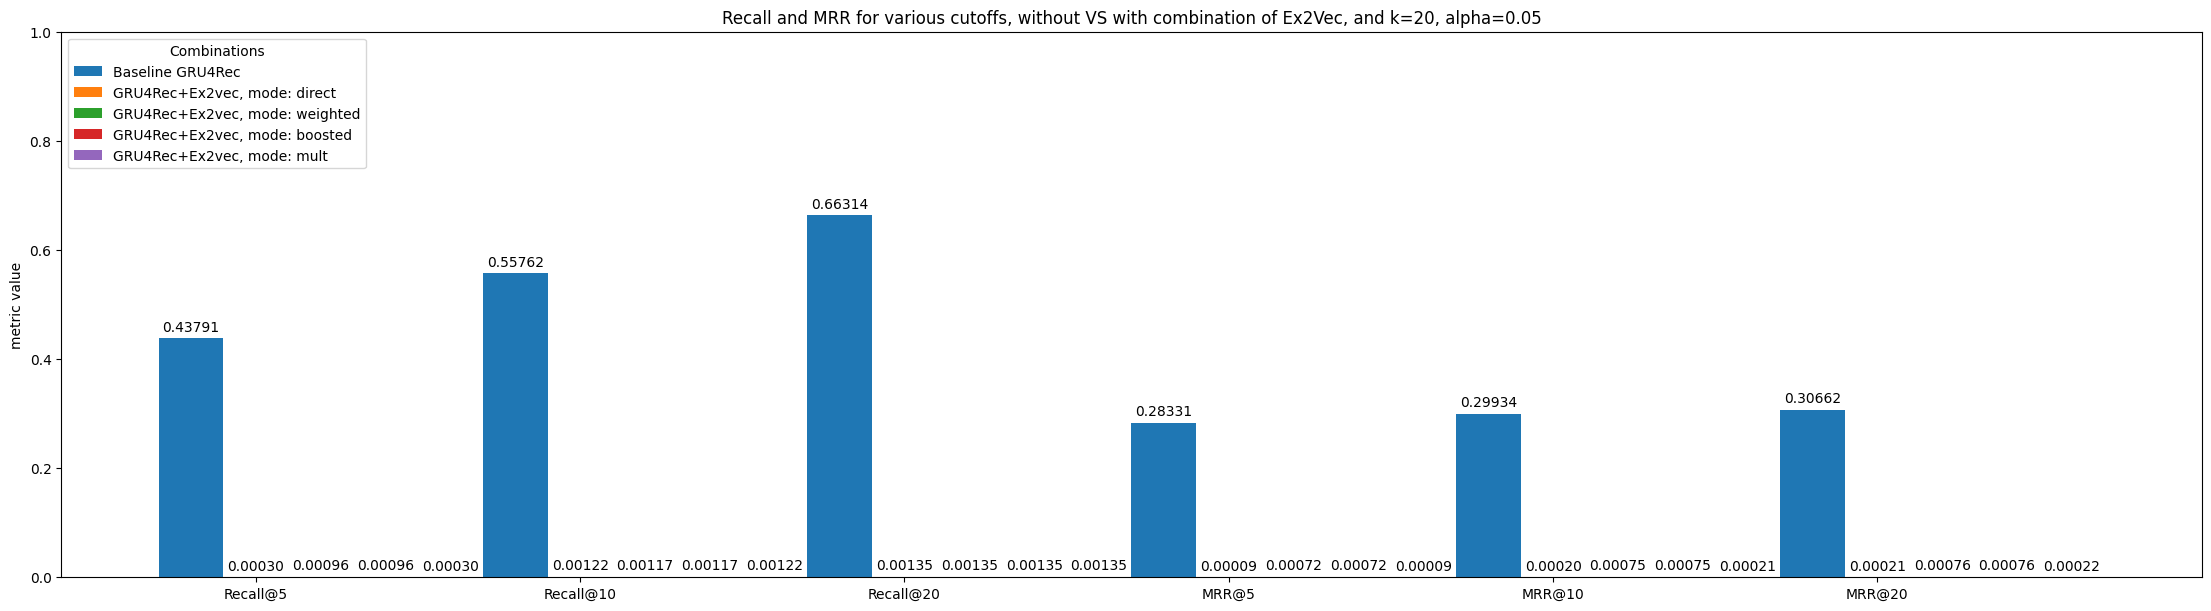

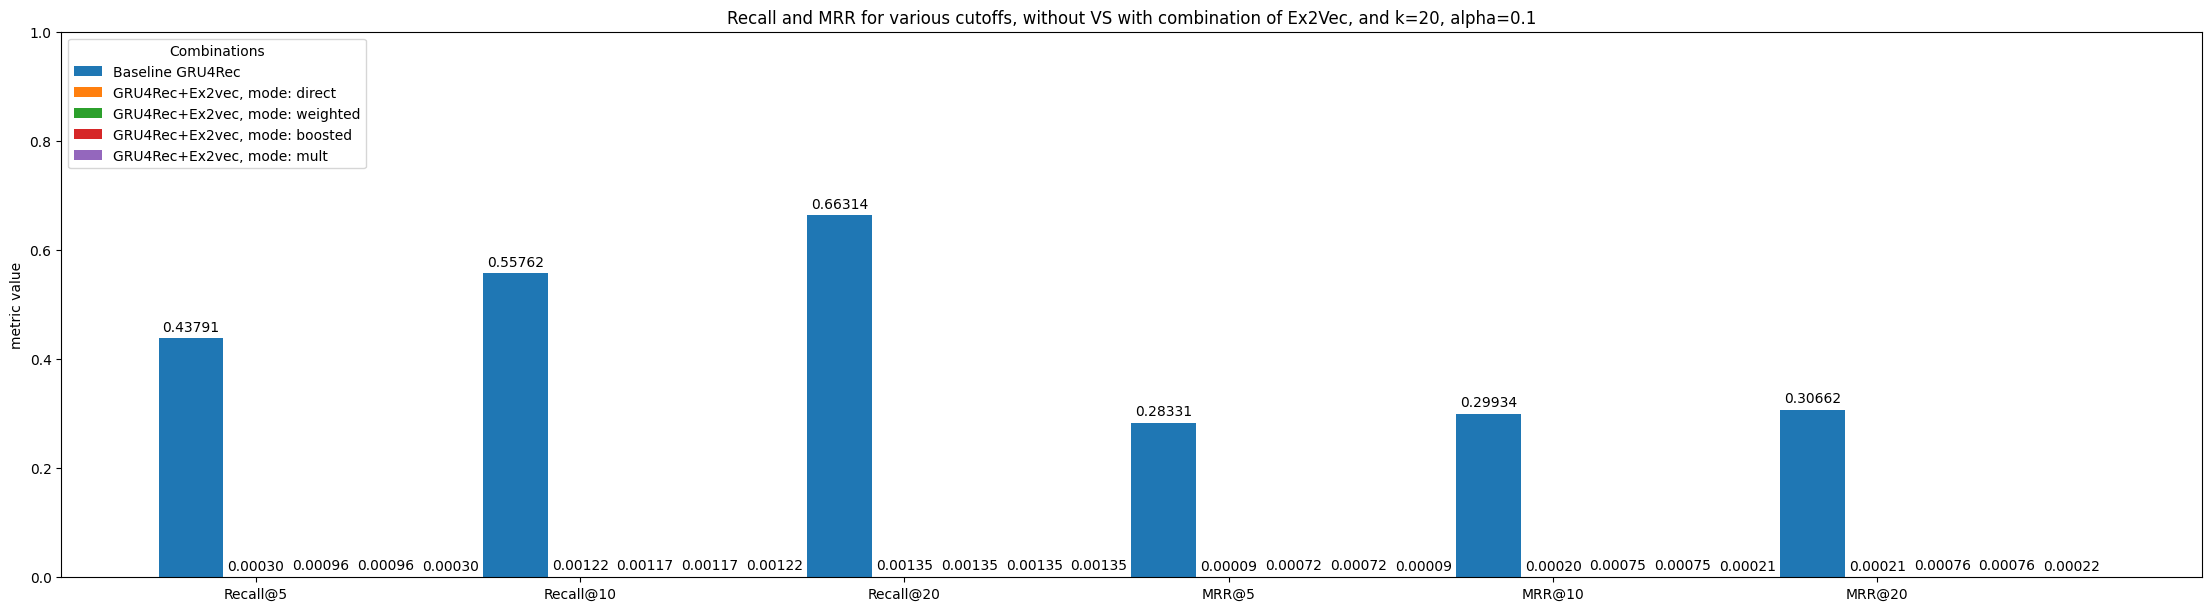

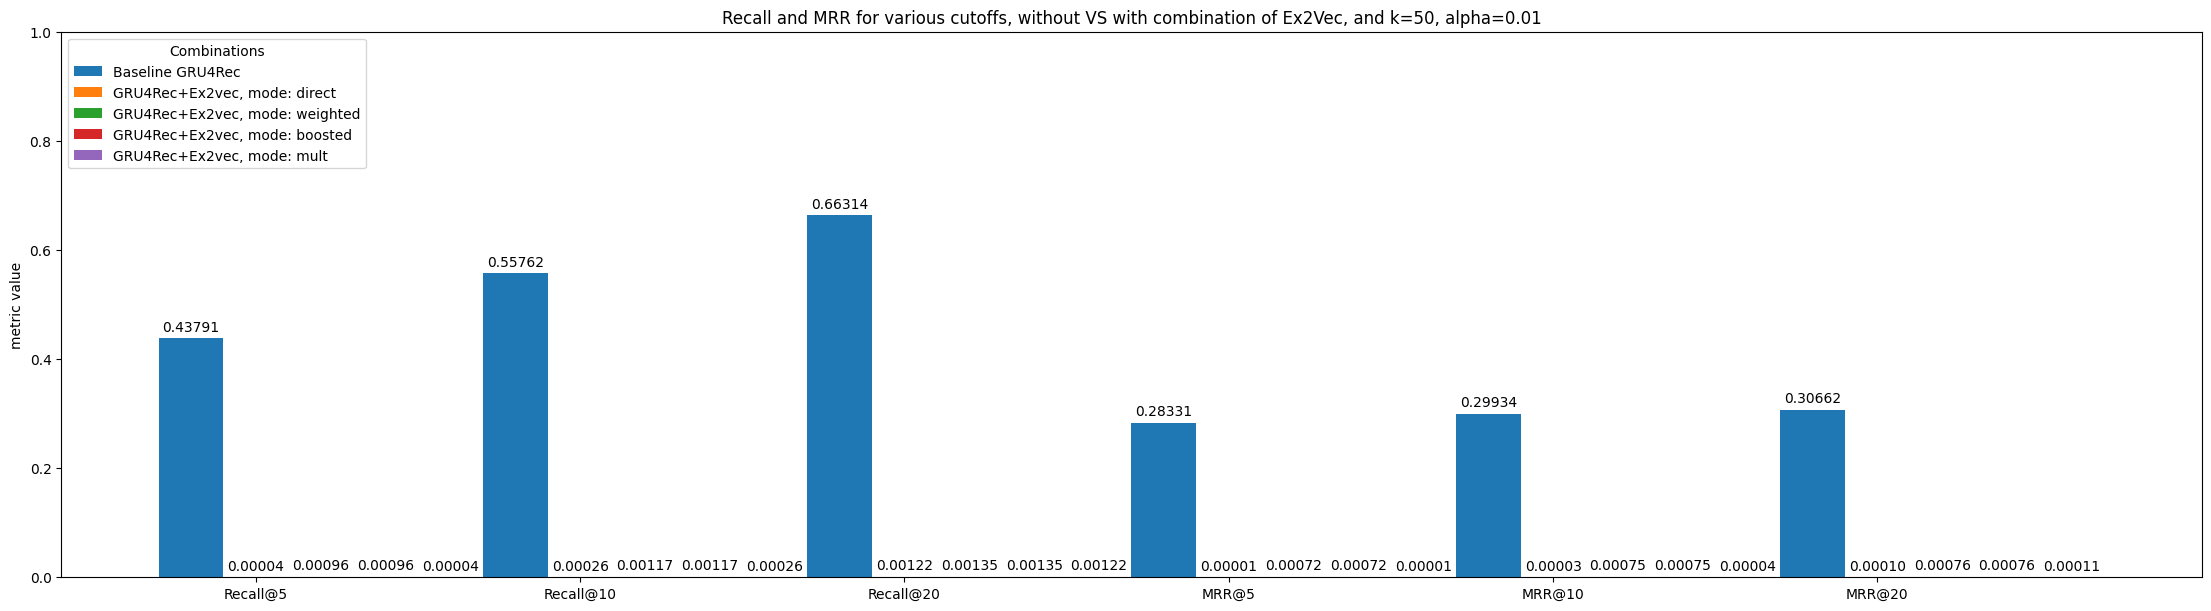

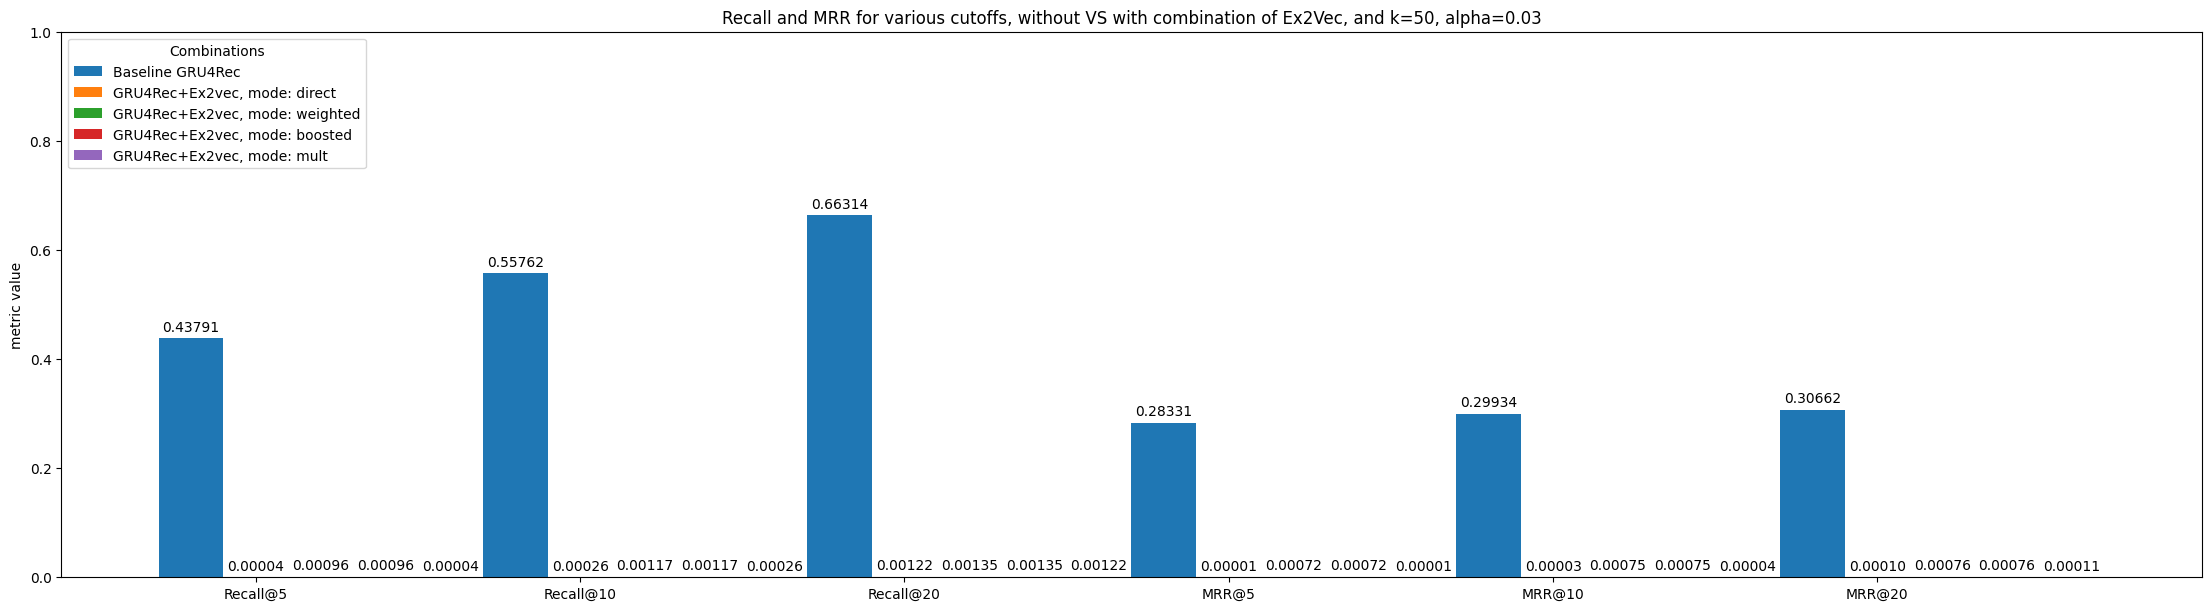

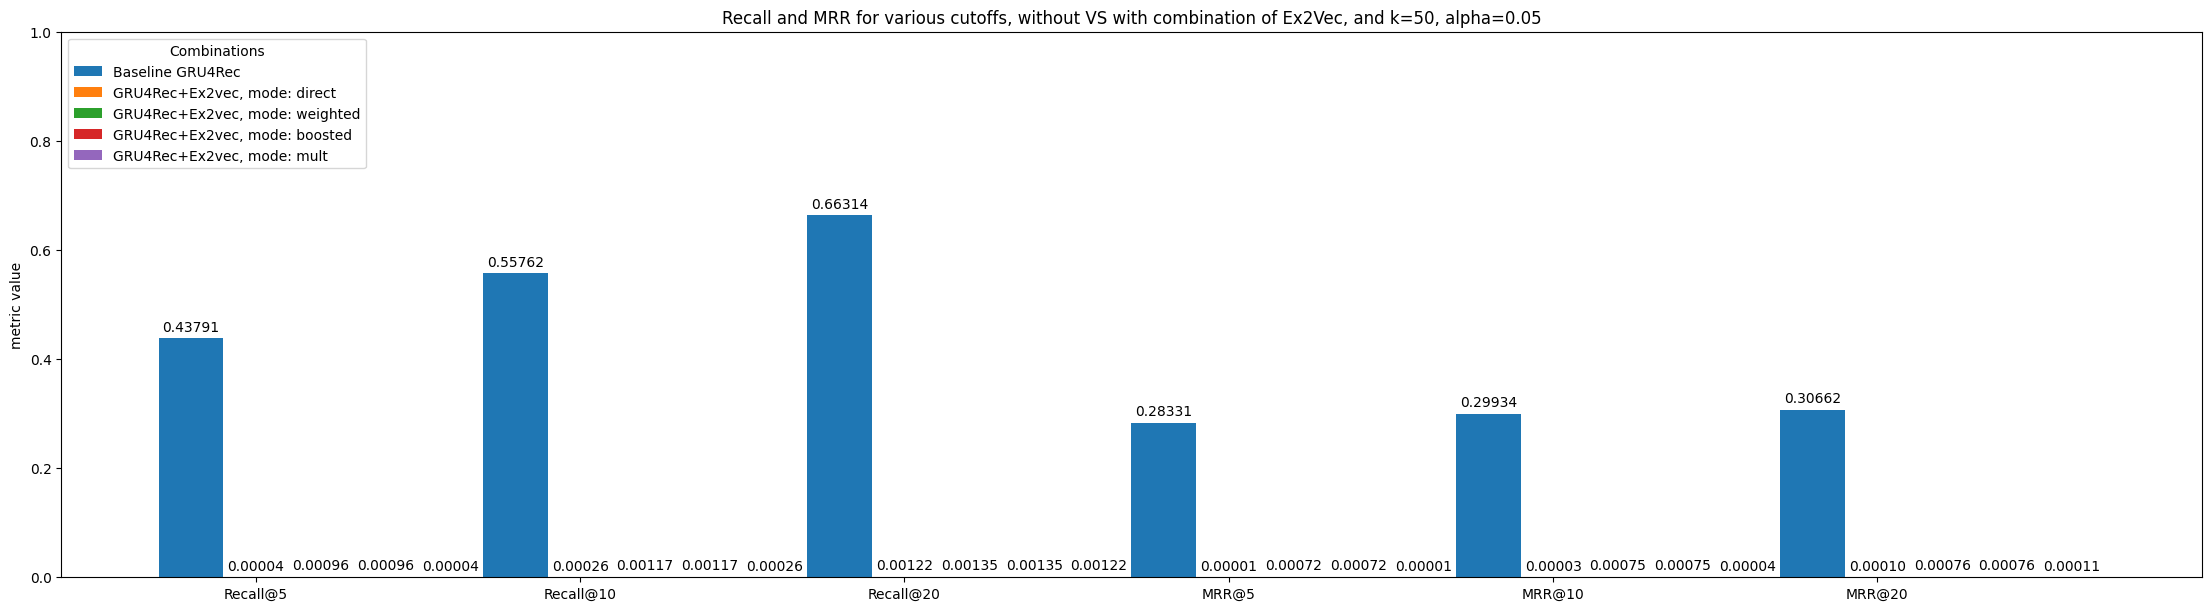

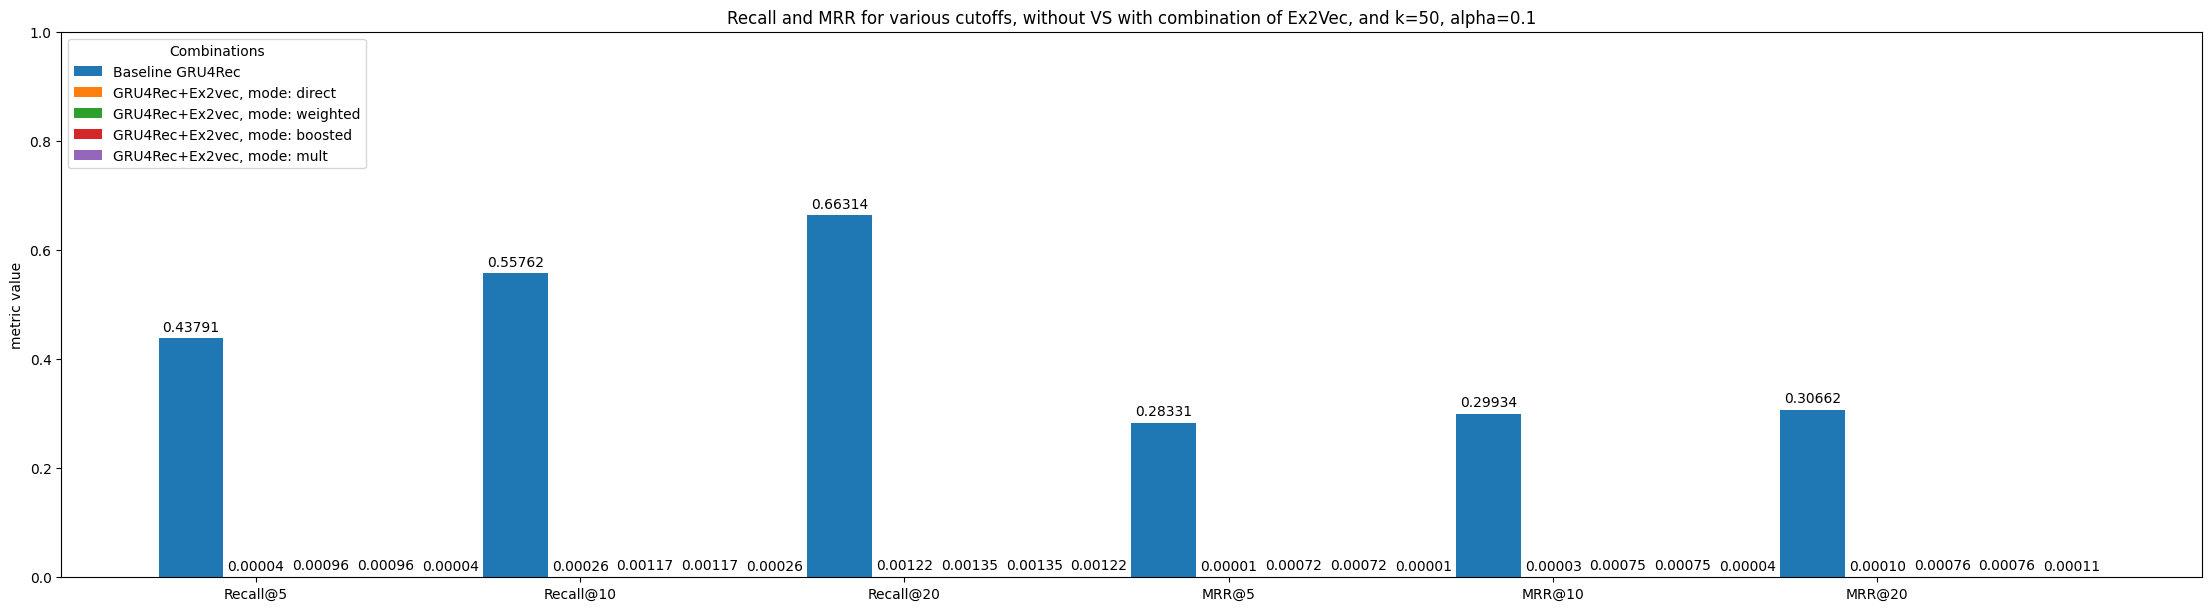

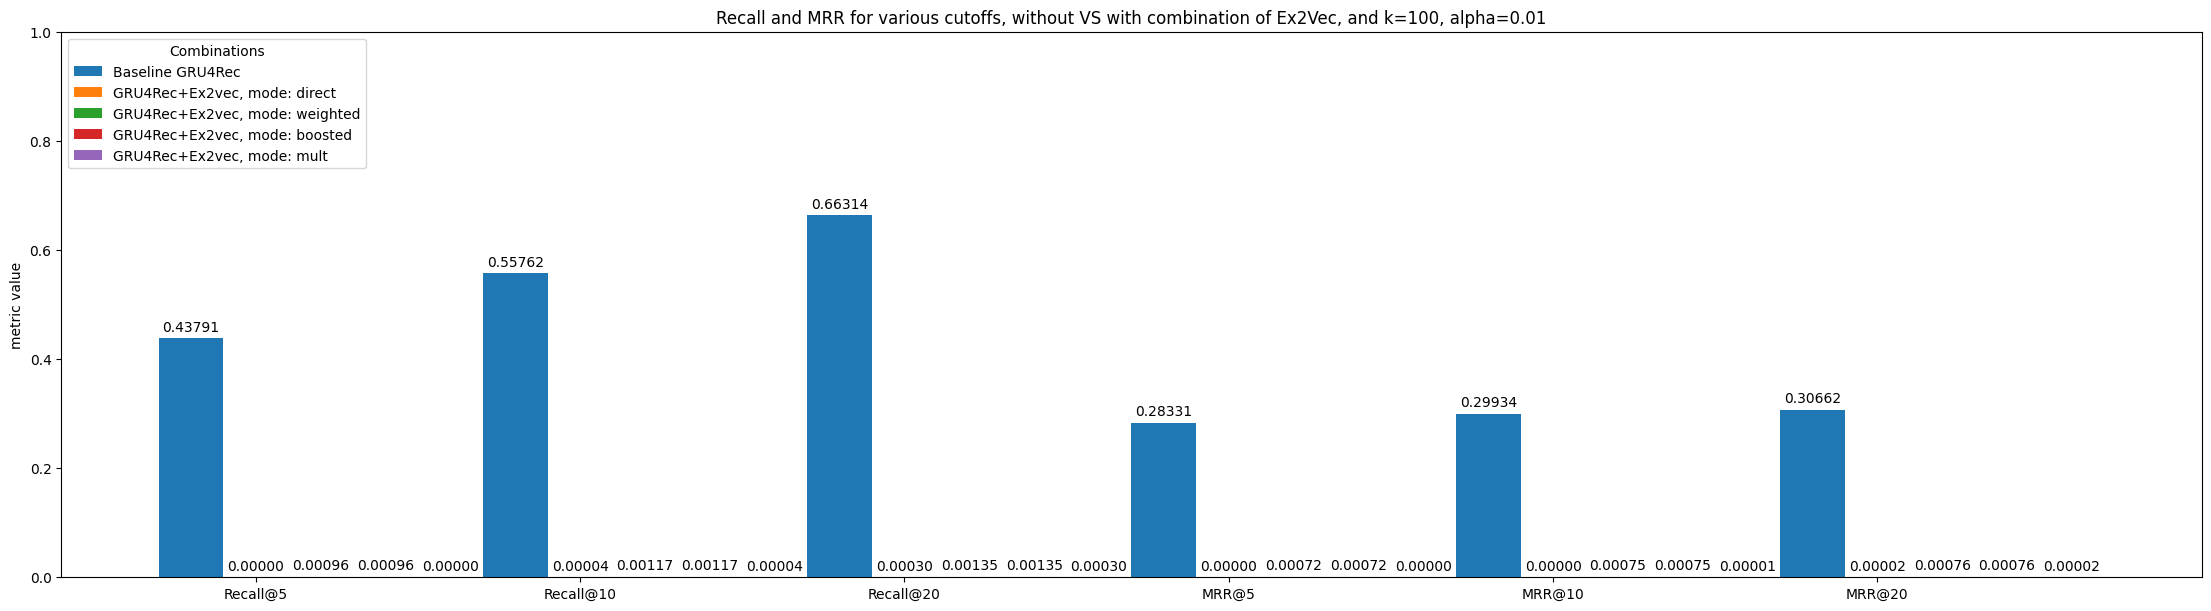

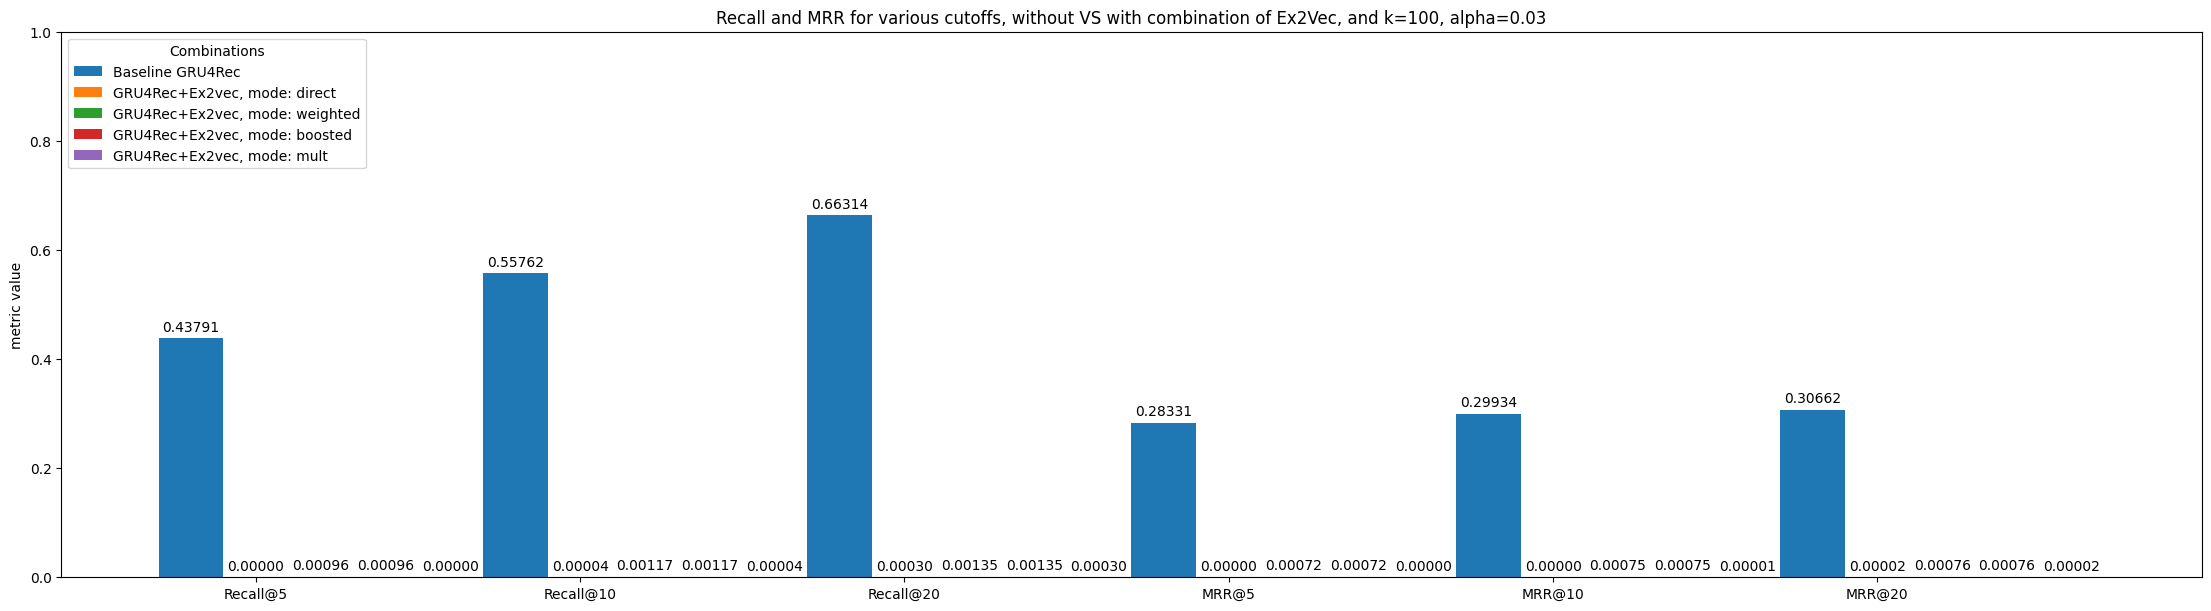

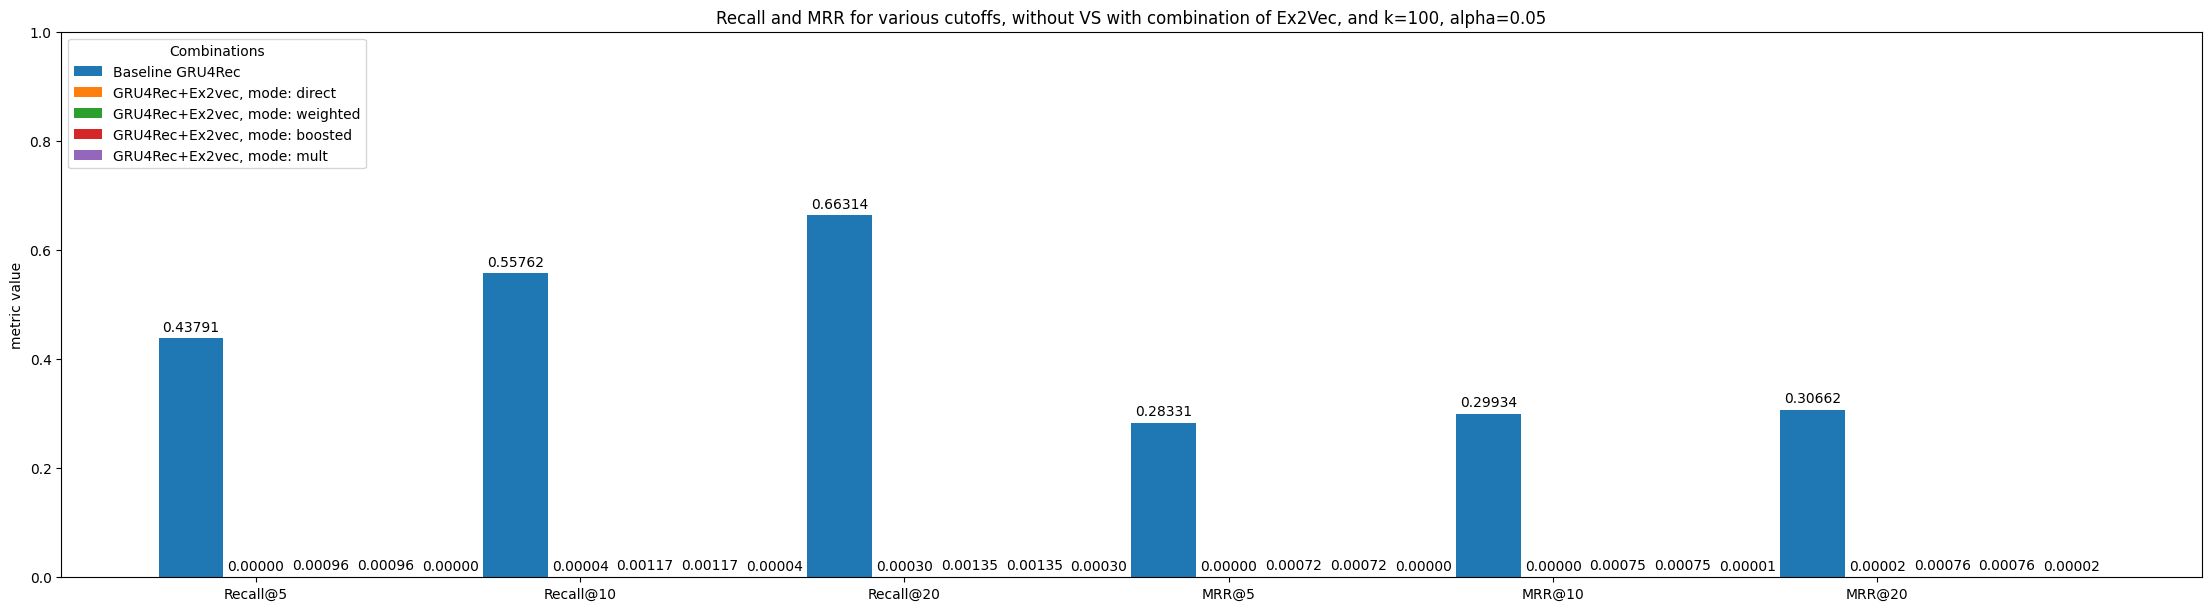

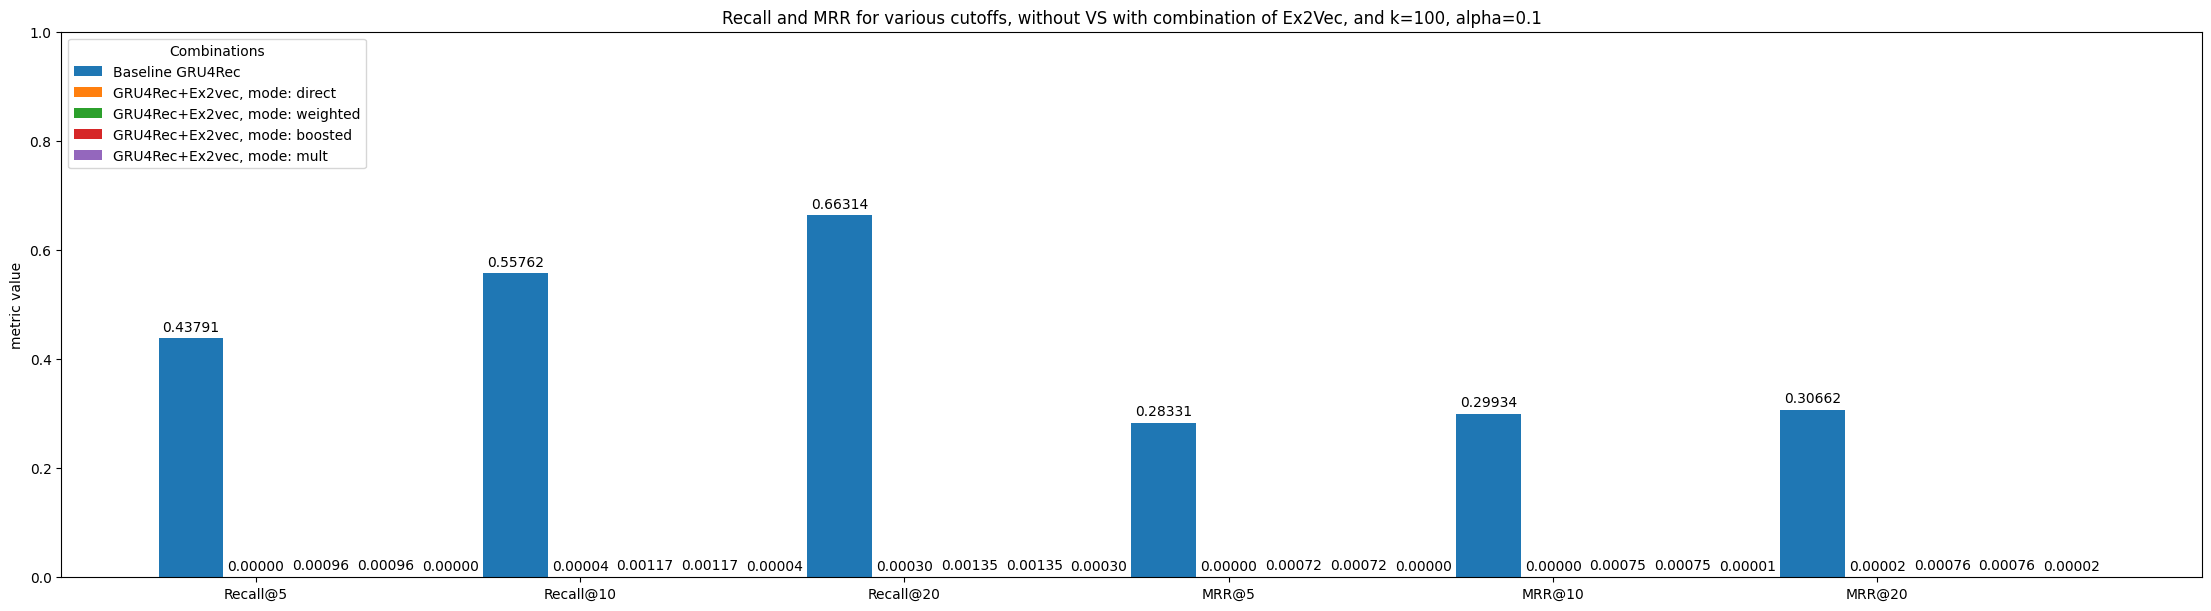

In [ ]:
# for each k and alpha, print the performance bar plots
for topk in topk_list:
    for alpha in alpha_list:
        score_comb_df = pd.read_csv('/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/results/score_combination.csv')
        gru4rec_rows = score_comb_df[score_comb_df['k'] == topk] # filter out rows for a certain k

        # x axis values
        gru4rec_combi_metrics = tuple([f"Recall@{c}" for c in cutoff] + [f"MRR@{c}" for c in cutoff])
        x = np.arange(len(gru4rec_combi_metrics))

        metrics_dict = {}
        for recalls, mrrs, baseline_recalls, baseline_mrrs, combination_mode in zip(gru4rec_rows['recalls'], gru4rec_rows['mrrs'], gru4rec_rows['baseline_recalls'], gru4rec_rows['baseline_mrrs'], gru4rec_rows['combination_mode']):
            # split out values, e.g. Recall@1=0.2433,Recall@5=0.453,MRR@1=0.123,MRR@5=0.431
            baseline_recall_vals = [float(recall.split('=')[1]) for recall in baseline_recalls.split(',')]
            baseline_mrr_vals = [float(mrr.split('=')[1]) for mrr in baseline_mrrs.split(',')]
            metrics_before = baseline_recall_vals + baseline_mrr_vals

            recall_vals = [float(recall.split('=')[1]) for recall in recalls.split(',')]
            mrr_vals = [float(mrr.split('=')[1]) for mrr in mrrs.split(',')]
            metrics_after = recall_vals + mrr_vals

            # add all before and after metrics to dict as tuples
            metrics_dict["Baseline GRU4Rec"] = tuple(metrics_before)
            metrics_dict[f"GRU4Rec+Ex2vec, mode: {combination_mode}"] = tuple(metrics_after)

        width = 0.2
        multiplier = 0
        fig, ax = plt.subplots(figsize=(22,6), layout='constrained')

        for k,v in metrics_dict.items():
            offset = width * multiplier
            rects = ax.bar(x + offset, v, width, label=k)
            ax.bar_label(rects, labels=[f"{va:.5f}" for va in v], padding=3)
            multiplier += 1

        ax.set_ylabel('metric value')
        ax.set_title(f'Recall and MRR for various cutoffs, without VS with combination of Ex2Vec, and k={topk}, alpha={alpha}')
        ax.set_xticks(x + width, gru4rec_combi_metrics)
        ax.legend(title='Combinations', loc='upper left', ncols=1)
        ax.set_ylim(0, 1)

        plt.show()

## Combination Idea 3: Training GRU4Rec with Ex2Vec as regularization

In [ ]:
# retrain gru4rec with best params
"""
params: (from https://github.com/hidasib/GRU4Rec/blob/master/README.md)
  -t    Testset path
  -pf   Parameter file path
  -s    Path to save the state dict to
  -m    Calculate recall, MRR etc. at the given list length
  -ik   Item key
  -tk   Timestamp key
  -d    Device
"""

gru4rec_best_param_str = convert_to_param_str('/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/optim/best_params_gru4rec_DEL.json')
combination_mode = 'boosted'
cutoffs = '1 5 10 20'
alpha_list = '0.2'

command = f'python /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/GRU4Rec_Fork/run.py /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/data/seq_combined.csv -ps {gru4rec_best_param_str} -t /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/data/seq_test.csv -s /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/models/GRU4Rec_bestparams_ex2vecreg_DEL.pt -m {cutoffs} -a {alpha_list} -ik "itemId" -tk "timestamp" -pm recall -lpm -c {combination_mode} -ex /content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/models/ex2vec_baseline_finaltrain_DEL__BS512LR0.0003208416119525183L_DIM64N_EP30_Epoch29_f10.2947.pt'
get_ipython().system(command)

[1, 5, 10, 20]
The size of the training set is: 1412
The size of the validation set is: 200
The size of the test set is: 409
The size of the combined (train+val) set is: 1612
Creating GRU4Rec model on device "cuda:0"
SET   loss                    TO   bpr-max               (type: <class 'str'>)
SET   constrained_embedding   TO   True                  (type: <class 'bool'>)
SET   embedding               TO   0                     (type: <class 'int'>)
SET   elu_param               TO   0.0                   (type: <class 'float'>)
SET   layers                  TO   [64]                  (type: <class 'list'>)
SET   n_epochs                TO   10                    (type: <class 'int'>)
SET   batch_size              TO   320                   (type: <class 'int'>)
SET   dropout_p_embed         TO   0.30000000000000004   (type: <class 'float'>)
SET   dropout_p_hidden        TO   0.15000000000000002   (type: <class 'float'>)
SET   learning_rate           TO   0.0011                (type: 

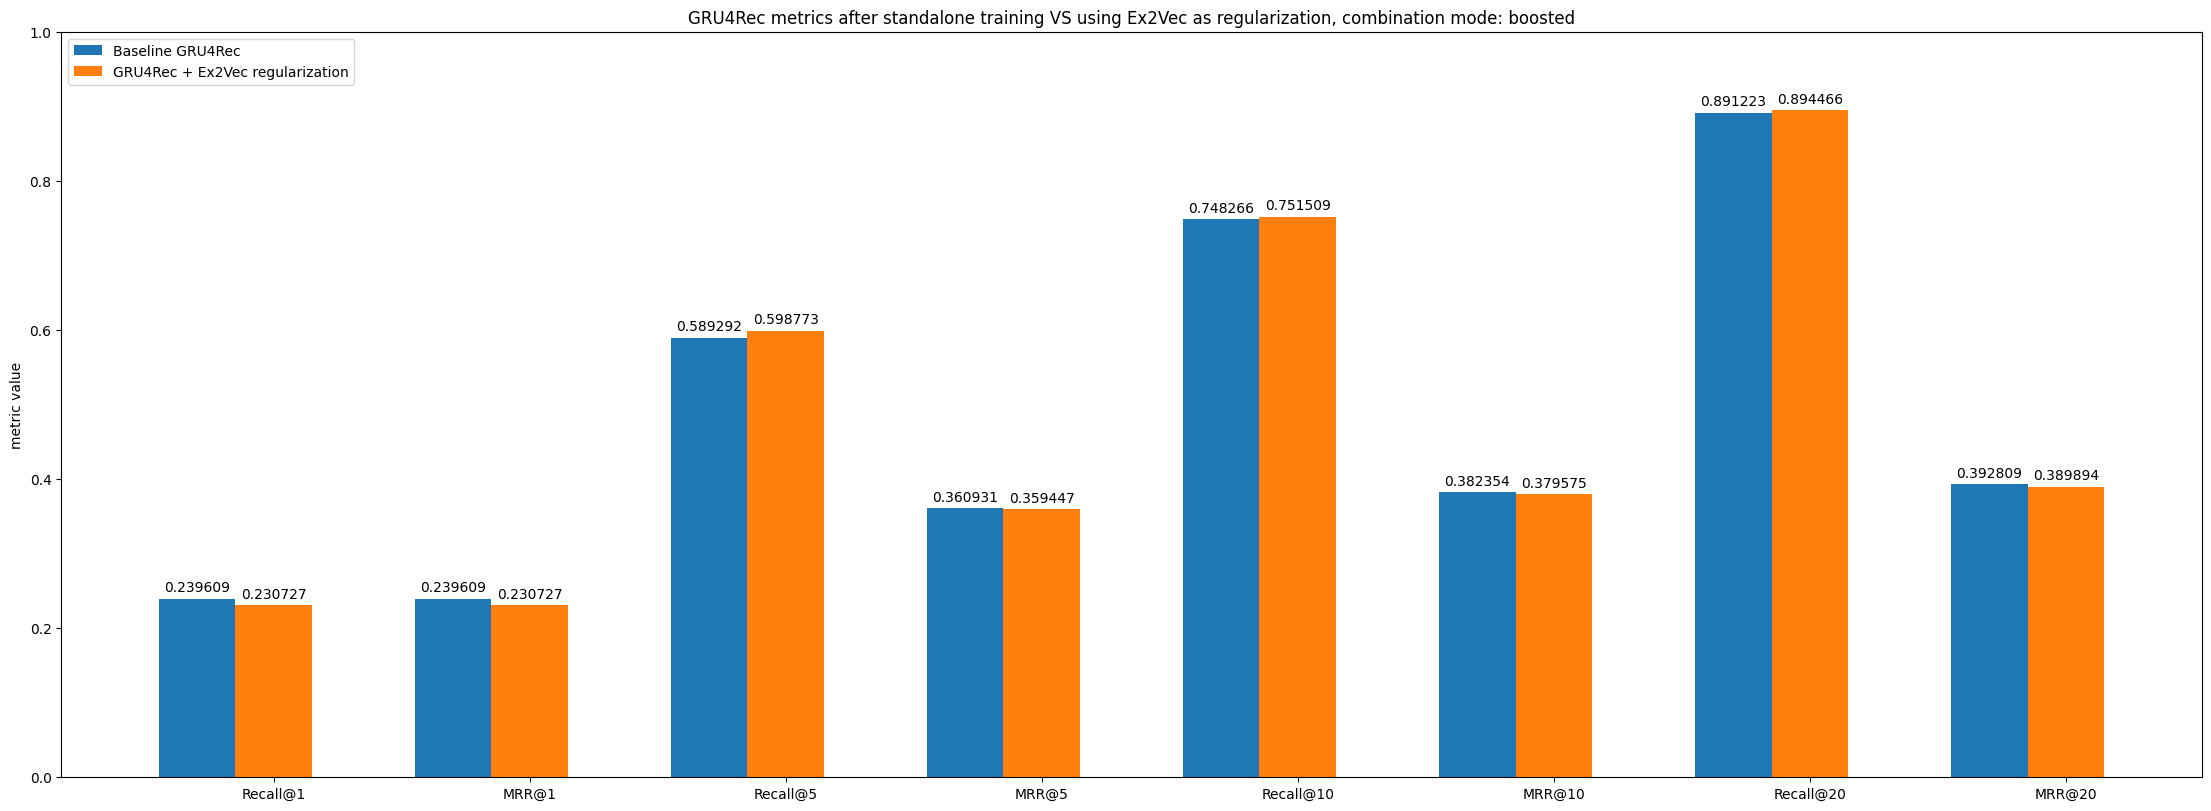

In [ ]:
# load all trained model information
best_models_df = pd.read_csv('/content/drive/MyDrive/JKU/practical_work/Practical-Work-AI/results/best_models.csv')

# extract metrics from gru4rec VS gru4rec + ex2vec regularization
gru4rec_rows = best_models_df[best_models_df['model_name'].str.contains('GRU4Rec_bestparams_')]

before_after_lists = []
for metric_str in gru4rec_rows['results']: # recall@1=0.2396088019559902, mrr@1=0.2396088019559902, ...
    metrics_list = metric_str.split(', ') # [recall@1=0.2396088019559902, mrr@1=0.2396088019559902,...]
    metrics_values = [float(metric.split('=')[1]) for metric in metrics_list] # [0.2396088019559902, 0.2396088019559902, ...]
    before_after_lists.append(metrics_values)

metrics = ('Recall@1', 'MRR@1', 'Recall@5', 'MRR@5', 'Recall@10', 'MRR@10', 'Recall@20', 'MRR@20')
metric_dict = {
    'Baseline GRU4Rec': tuple(before_after_lists[0]),
    'GRU4Rec + Ex2Vec regularization': tuple(before_after_lists[1]),
}

x = np.arange(len(metrics))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(22,8), layout='constrained')

for k,v in metric_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, v, width, label=k)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('metric value')
ax.set_title(f'GRU4Rec metrics after standalone training VS using Ex2Vec as regularization, combination mode: {combination_mode}')
ax.set_xticks(x + width, metrics)
ax.legend(loc='upper left', ncols=1)
ax.set_ylim(0, 1)

plt.show()

In [ ]:
# train ex2vec
# pass one user history and get score distribution for his specific items
# lower 20% give as negative samples to gru4rec